# ***Experiment 1 (Method ID - Raw)***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Data Preprocessing***

In [2]:
import pandas as pd
path = '/content/drive/MyDrive/SCC/'
df_category = pd.read_csv(f'{path}data/collections_final.csv')

In [3]:
contracts_with_transactions =  df_category['category'].unique()
contracts_with_transactions = contracts_with_transactions.tolist()
contracts_with_transactions

['arts', 'avatar', 'collectibles', 'memberships', 'games']

In [4]:
df_category['category'].value_counts()

category
avatar          601
arts            600
games           431
memberships     409
collectibles    365
Name: count, dtype: int64

In [5]:
days = 0
df_method = pd.read_csv(f'{path}data/raw_data_first_{days}_final.csv')
df_method.head()

,contract_address,block_date,txn_hash,value,min_block_date,cutoff_block_date,method
0,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,BD2B0AA77BD47F6A9FEDC004CF17E3312112E114567E9E...,0.000000e+00,2021-10-01,2021-10-01,0xa22cb465
1,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,94D6FD95DC45026998BA5BD804DC9113001340CEA279E0...,0.000000e+00,2021-10-01,2021-10-01,0xa22cb465
2,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,F7D00DCFA07BC5B68ADD3607A5C65687C7CDCF0B3B9754...,0.000000e+00,2021-10-01,2021-10-01,0xa22cb465
3,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,DDBD3F8175FC494F0EFDD6A947CA62DCFE0E60D22B2F2C...,3.000000e+16,2021-10-01,2021-10-01,0xbf3f2153
4,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,81768E048E7386236C309C0EA62833839EA6128FC284DB...,0.000000e+00,2021-10-01,2021-10-01,0xa22cb465


In [6]:
print("before merge ::: ", df_method.shape)
df_method = pd.merge(df_method, df_category, on=['contract_address'], how='inner')
print("after merge ::: ", df_method.shape)

before merge :::  (5321062, 7)
after merge :::  (5397819, 12)


In [7]:
contracts_with_transactions = set(df_method['contract_address'])

In [8]:
print(f"Lenght of contracts_with_transactions {len(contracts_with_transactions)}")
df_method.drop(columns = ['category'], inplace=True)
print()

print('df_category shape ::: ', df_category.shape)
df_category = df_category[df_category['contract_address'].isin(contracts_with_transactions)]
print('df_category shape ::: ', df_category.shape)
print()

print(df_category['category'].value_counts())

print()
categories_of_interest = list(set(df_category['category']))
print(f"categories_of_interest : {categories_of_interest}")

Lenght of contracts_with_transactions 2375

df_category shape :::  (2406, 6)
df_category shape :::  (2406, 6)

category
avatar          601
arts            600
games           431
memberships     409
collectibles    365
Name: count, dtype: int64

categories_of_interest : ['arts', 'avatar', 'games', 'memberships', 'collectibles']


In [9]:
df_functions = pd.read_csv(f'{path}data/function_name.csv')
df_functions.shape

(2806, 4)

# ***Feature Engineering***

In [10]:
df_method = df_method.groupby(['contract_address', 'method']).agg({'txn_hash' : 'nunique'})
df_method = df_method.pivot_table(index=['contract_address'], columns = 'method', values = 'txn_hash')
df_method

method,0x,0x00,0x0000,0x00000000,0x00257612,0x004a84cb,0x00545759,0x00644cef,0x0069496e,0x00739f2a,...,0xff44e915,0xff4a5dbb,0xff580055,0xff70fa49,0xff7185f3,0xff99d8ce,0xffadae40,0xffd9f3af,0xffdb7163,0xffe630b5
contract_address,,,,,,,,,,,,,,,,,,,,,
0x00039fc9e54a042a0bdc85a0baf3a0274c3564dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x0018ba792df599c6e0689dce908220978fd8cb57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x00d1a09205bbd5a2ea35524afafb41aa2d5e423e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x01a8f00c64bbcbfe80087a14e9cc48001e8cb810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x01b6e3aabe55d9ab81ef306479801448a4ca60c9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xff2790802f3ca1777c632892394f8afaca92bd9c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xff796cbbe32b2150a4585a3791cadb213d0f35a3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xff9c1b15b16263c61d017ee9f65c50e4ae0113d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_feat_engg = df_method

df_feat_engg['contract_address'] = df_method.index.values
df_feat_engg.reset_index(drop=True, inplace=True)

print()

print(df_feat_engg.shape)
df_feat_engg = pd.merge(df_feat_engg, df_category, on = 'contract_address', how='inner')

print()
print(df_feat_engg.shape)

print(f"df_feat_engg : {df_feat_engg.head()}")
print()


(2375, 4070)

(2406, 4075)
df_feat_engg :    0x  0x00  0x0000  0x00000000  0x00257612  0x004a84cb  0x00545759  \
0 NaN   NaN     NaN         NaN         NaN         NaN         NaN   
1 NaN   NaN     NaN         NaN         NaN         NaN         NaN   
2 NaN   NaN     NaN         NaN         NaN         NaN         NaN   
3 NaN   NaN     NaN         NaN         NaN         NaN         NaN   
4 NaN   NaN     NaN         NaN         NaN         NaN         NaN   

   0x00644cef  0x0069496e  0x00739f2a  ...  0xffadae40  0xffd9f3af  \
0         NaN         NaN         NaN  ...         NaN         NaN   
1         NaN         NaN         NaN  ...         NaN         NaN   
2         NaN         NaN         NaN  ...         NaN         NaN   
3         NaN         NaN         NaN  ...         NaN         NaN   
4         NaN         NaN         NaN  ...         NaN         NaN   

   0xffdb7163  0xffe630b5                            contract_address  \
0         NaN         NaN  0x00039fc

In [12]:
df_feat_engg.shape

(2406, 4075)

In [13]:
df_feat_engg.head()

,0x,0x00,0x0000,0x00000000,0x00257612,0x004a84cb,0x00545759,0x00644cef,0x0069496e,0x00739f2a,...,0xffadae40,0xffd9f3af,0xffdb7163,0xffe630b5,contract_address,url,collection,description,category,blockchain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0x00039fc9e54a042a0bdc85a0baf3a0274c3564dc,NaN,The Million Dollar Punk Draw,The home of 150 tickets for The Million Dollar...,collectibles,ethereum
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0x0018ba792df599c6e0689dce908220978fd8cb57,NaN,EtherKingdoms,NaN,games,ethereum
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0x00d1a09205bbd5a2ea35524afafb41aa2d5e423e,https://opensea.io/collection/proxcity,Proxcity,Mint Still Open For 0 07 ETH https proxc...,games,ethereum
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0x01a8f00c64bbcbfe80087a14e9cc48001e8cb810,https://opensea.io/collection/earlybirdsgenesis,Early Birds Genesis,75% staked as of 6/6/23 - Holder count is inac...,memberships,ethereum
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0x01b6e3aabe55d9ab81ef306479801448a4ca60c9,NaN,CryptoRacing,NaN,games,ethereum


# ***LightGBM***

Proposed Model

In [14]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
import pickle
import os

le = LabelEncoder()
df_feat_engg['category']= le.fit_transform(df_feat_engg['category'])

print(df_feat_engg.dtypes)

X = df_feat_engg.drop(labels=['collection', 'category','description','contract_address','url','blockchain'], axis=1)
y = df_feat_engg['category'].values.astype('int32')

param = {'objective': 'multiclass',
         'boosting': 'gbdt',
         'learning_rate': 0.1,
         'num_iterations': 5000,
         'min_data_in_leaf': 10,
         'bagging_fraction': 0.80,
         'bagging_freq': 5,
         'feature_fraction': 0.8,
         }

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics_list = []

for i, (train_index, test_index) in enumerate(fold.split(X, y)):
    print(i)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(len(X_train),len(X_test),len(y_train),len(y_test))

    model = LGBMClassifier(**param)

    es = early_stopping(stopping_rounds=200, first_metric_only= True)
    model = model.fit(X_train,y_train,
                    callbacks = [es, log_evaluation(100)],
                    eval_set = (X_test, y_test),
                    eval_metric = 'multiclass'
                    )
    print()
    print(f" model.classes_  : {model.classes_}")

    predict = model.predict_proba(X_test)
    print(predict.shape)

    X_test['predicted_class'] = [np.argmax(i) for i in predict]
    y_test_array = np.array(y_test)

    X_test['is_correct'] = np.where(y_test_array ==  X_test['predicted_class'], 1, 0)

    is_correct = X_test['is_correct'].sum()
    print(f"is_correct      : {X_test['is_correct'].sum()}")

    roc_auc = roc_auc_score(y_test_array, predict, average='macro', multi_class='ovr')
    f1 = f1_score(y_test_array, X_test['predicted_class'], average='micro')
    recall = recall_score(y_test_array, X_test['predicted_class'], average='macro')
    precision = precision_score(y_test_array, X_test['predicted_class'], average='micro')

    print(f"roc_auc_score    : {roc_auc}")
    print(f"f1_score         : {f1}")
    print(f"recall_score     : {recall}")
    print(f"precision_score  : {precision}")

    metrics_dict = {
        'tot_samples': len(y_test_array),
        'is_correct': is_correct,
        'roc_auc_score': roc_auc,
        'f1_score': f1,
        'recall_score': recall,
        'precision_score': precision
    }

    # directory = "/dbfs/FileStore/SCCC/3_day_models"
    # if not os.path.exists(directory):
    #     os.makedirs(directory)

    metrics_list.append(metrics_dict)

    # file_path = f"{directory}/model_{i}.pkl"

    # if os.path.exists(file_path):
    #  os.remove(file_path)

    # with open(file_path, 'wb') as file:
    #     pickle.dump(model, file)


0x             float64
0x00           float64
0x0000         float64
0x00000000     float64
0x00257612     float64
                ...   
url             object
collection      object
description     object
category         int64
blockchain      object
Length: 4075, dtype: object
0
1924 482 1924 482
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1497
[LightGBM] [Info] Number of data points in the train set: 1924, number of used features: 88
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 wil

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1502
[LightGBM] [Info] Number of data points in the train set: 1925, number of used features: 91
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 wil

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1485
[LightGBM] [Info] Number of data points in the train set: 1925, number of used features: 89
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20

In [16]:
results_lgbm = pd.DataFrame(metrics_list)
results_lgbm

,tot_samples,is_correct,roc_auc_score,f1_score,recall_score,precision_score
0,482,426,0.988623,0.883817,0.868433,0.883817
1,481,427,0.986280,0.887734,0.865482,0.887734
2,481,426,0.986189,0.885655,0.863726,0.885655
3,481,430,0.988867,0.893971,0.875946,0.893971
4,481,417,0.986176,0.866944,0.847855,0.866944


In [18]:
results_lgbm.to_csv(f'{path}results/exp-2-lgbm.csv',index = False)

# ***Random Forest***

Proposed Model

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

# Assuming df_feat_engg is your DataFrame
# Replace df_feat_engg with the name of your DataFrame

# Label encode the 'category' column
le = LabelEncoder()
df_feat_engg['category'] = le.fit_transform(df_feat_engg['category'])

# Drop irrelevant columns
X = df_feat_engg.drop(labels=['collection', 'category', 'description', 'contract_address', 'url', 'blockchain'], axis=1)
y = df_feat_engg['category'].values.astype('int32')

# Impute missing values in X with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

param = {
    'n_estimators': 100,  # Number of trees in the forest
    'max_depth': None,    # Maximum depth of the tree
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'auto',
    'bootstrap': True,
    'random_state': 42,
}

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics_list = []

for i, (train_index, test_index) in enumerate(fold.split(X_imputed, y)):
    print(i)
    X_train, X_test = X_imputed[train_index], X_imputed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(len(X_train), len(X_test), len(y_train), len(y_test))

    model = RandomForestClassifier(**param)
    model.fit(X_train, y_train)

    predict = model.predict_proba(X_test)
    print(predict.shape)

    predicted_class = np.argmax(predict, axis=1)

    is_correct = np.sum(predicted_class == y_test)

    roc_auc = roc_auc_score(y_test, predict, average='macro', multi_class='ovr')
    acc = accuracy_score(y_test, predicted_class)
    f1 = f1_score(y_test, predicted_class, average='micro')
    recall = recall_score(y_test, predicted_class, average='macro')
    precision = precision_score(y_test, predicted_class, average='micro')

    print(f"roc_auc_score    : {roc_auc}")
    print(f"is_correct       : {is_correct}")
    print(f"accuracy         : {acc}")
    print(f"f1_score         : {f1}")
    print(f"recall_score     : {recall}")
    print(f"precision_score  : {precision}")

    metrics_dict = {
        'tot_samples': len(y_test_array),
        'is_correct': is_correct,
        'roc_auc_score': roc_auc,
        'accuracy': acc,
        'f1_score': f1,
        'recall_score': recall,
        'precision_score': precision
    }

    metrics_list.append(metrics_dict)


0
1924 482 1924 482


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(482, 5)
roc_auc_score    : 0.9816493729228194
is_correct       : 426
accuracy         : 0.8838174273858921
f1_score         : 0.8838174273858921
recall_score     : 0.86842624654816
precision_score  : 0.8838174273858921
1
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(481, 5)
roc_auc_score    : 0.9808448364007102
is_correct       : 419
accuracy         : 0.8711018711018711
f1_score         : 0.8711018711018711
recall_score     : 0.8546346384457791
precision_score  : 0.8711018711018711
2
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(481, 5)
roc_auc_score    : 0.9806588519107668
is_correct       : 424
accuracy         : 0.8814968814968815
f1_score         : 0.8814968814968815
recall_score     : 0.8612375776035556
precision_score  : 0.8814968814968815
3
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(481, 5)
roc_auc_score    : 0.9856081690057212
is_correct       : 423
accuracy         : 0.8794178794178794
f1_score         : 0.8794178794178794
recall_score     : 0.8667816248248498
precision_score  : 0.8794178794178794
4
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(481, 5)
roc_auc_score    : 0.9795565588737976
is_correct       : 426
accuracy         : 0.8856548856548857
f1_score         : 0.8856548856548857
recall_score     : 0.8689928955676942
precision_score  : 0.8856548856548857


In [20]:
results_rf = pd.DataFrame(metrics_list)
results_rf

,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,481,426,0.981649,0.883817,0.883817,0.868426,0.883817
1,481,419,0.980845,0.871102,0.871102,0.854635,0.871102
2,481,424,0.980659,0.881497,0.881497,0.861238,0.881497
3,481,423,0.985608,0.879418,0.879418,0.866782,0.879418
4,481,426,0.979557,0.885655,0.885655,0.868993,0.885655


In [21]:
results_rf.to_csv(f'{path}results/exp-2-rf.csv',index = False)

# ***XGBoost***

Baseline Model

In [22]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

le = LabelEncoder()
df_feat_engg['category'] = le.fit_transform(df_feat_engg['category'])

print(df_feat_engg.dtypes)

X = df_feat_engg.drop(labels=['collection', 'category','description','contract_address','url','blockchain'], axis=1)
y = df_feat_engg['category'].values.astype('int32')

param = {'objective': 'multi:softmax',
         'num_class': len(np.unique(y)),  # Number of classes
         'learning_rate': 0.1,
         'n_estimators': 5000,
         'min_child_weight': 1,
         'gamma': 0,
         'subsample': 0.8,
         'colsample_bytree': 0.8,
         'eval_metric': 'mlogloss',  # Multi-class log loss
         'verbosity': 0
         }

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics_list = []

for i, (train_index, test_index) in enumerate(fold.split(X, y)):
    print(i)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(len(X_train), len(X_test), len(y_train), len(y_test))

    model = XGBClassifier(**param)

    model = model.fit(X_train, y_train,
                      early_stopping_rounds=200,
                      eval_set=[(X_test, y_test)],
                      verbose=100)

    predict = model.predict_proba(X_test)
    print(predict.shape)

    # You may need to adjust the following lines based on the output structure of XGBoost
    X_test['predicted_class'] = [np.argmax(i) for i in predict]
    y_test_array = np.array(y_test)

    X_test['is_correct'] = np.where(y_test_array ==  X_test['predicted_class'], 1, 0)

    is_correct = X_test['is_correct'].sum()
    print(f"is_correct      : {X_test['is_correct'].sum()}")

    roc_auc = roc_auc_score(y_test_array, predict, average='macro', multi_class='ovr')
    acc = accuracy_score(y_test_array, X_test['predicted_class'])
    f1 = f1_score(y_test_array, X_test['predicted_class'], average='micro')
    recall = recall_score(y_test_array, X_test['predicted_class'], average='macro')
    precision = precision_score(y_test_array, X_test['predicted_class'], average='micro')

    print(f"roc_auc_score    : {roc_auc}")
    print(f"accuracy         : {acc}")
    print(f"f1_score         : {f1}")
    print(f"recall_score     : {recall}")
    print(f"precision_score  : {precision}")

    metrics_dict = {
        'tot_samples': len(y_test_array),
        'is_correct': is_correct,
        'roc_auc_score': roc_auc,
        'accuracy': acc,
        'f1_score': f1,
        'recall_score': recall,
        'precision_score': precision
    }

    metrics_list.append(metrics_dict)


0x             float64
0x00           float64
0x0000         float64
0x00000000     float64
0x00257612     float64
                ...   
url             object
collection      object
description     object
category         int64
blockchain      object
Length: 4075, dtype: object
0
1924 482 1924 482


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.44251
[100]	validation_0-mlogloss:0.26458
[200]	validation_0-mlogloss:0.27226
[293]	validation_0-mlogloss:0.27504
(482, 5)
is_correct      : 425
roc_auc_score    : 0.9888736108311832
accuracy         : 0.8817427385892116
f1_score         : 0.8817427385892116
recall_score     : 0.8662211759888576
precision_score  : 0.8817427385892116
1
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.43772
[100]	validation_0-mlogloss:0.24435
[200]	validation_0-mlogloss:0.25623
[300]	validation_0-mlogloss:0.26245
[304]	validation_0-mlogloss:0.26266
(481, 5)
is_correct      : 427
roc_auc_score    : 0.9881223150881505
accuracy         : 0.8877338877338877
f1_score         : 0.8877338877338877
recall_score     : 0.8661404388016483
precision_score  : 0.8877338877338877
2
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.44478
[100]	validation_0-mlogloss:0.25860
[200]	validation_0-mlogloss:0.26397
[300]	validation_0-mlogloss:0.26839
[317]	validation_0-mlogloss:0.26892
(481, 5)
is_correct      : 425
roc_auc_score    : 0.9872306747644588
accuracy         : 0.8835758835758836
f1_score         : 0.8835758835758836
recall_score     : 0.8591411743680991
precision_score  : 0.8835758835758836
3
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.44261
[100]	validation_0-mlogloss:0.24146
[200]	validation_0-mlogloss:0.24572
[300]	validation_0-mlogloss:0.24996
[314]	validation_0-mlogloss:0.24989
(481, 5)
is_correct      : 426
roc_auc_score    : 0.9889767379787798
accuracy         : 0.8856548856548857
f1_score         : 0.8856548856548857
recall_score     : 0.8655880387570999
precision_score  : 0.8856548856548857
4
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.43759
[100]	validation_0-mlogloss:0.27486
[200]	validation_0-mlogloss:0.28640
[273]	validation_0-mlogloss:0.29009
(481, 5)
is_correct      : 424
roc_auc_score    : 0.9866271942306941
accuracy         : 0.8814968814968815
f1_score         : 0.8814968814968815
recall_score     : 0.8641560540485939
precision_score  : 0.8814968814968815


In [23]:
results_xgboost = pd.DataFrame(metrics_list)
results_xgboost

,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,482,425,0.988874,0.881743,0.881743,0.866221,0.881743
1,481,427,0.988122,0.887734,0.887734,0.866140,0.887734
2,481,425,0.987231,0.883576,0.883576,0.859141,0.883576
3,481,426,0.988977,0.885655,0.885655,0.865588,0.885655
4,481,424,0.986627,0.881497,0.881497,0.864156,0.881497


In [24]:
results_xgboost.to_csv(f'{path}results/exp-2-xgboost.csv',index = False)

# ***Results***

In [ ]:
results_lgbm

,tot_samples,is_correct,roc_auc_score,f1_score,recall_score,precision_score
0,482,426,0.988623,0.883817,0.883817,0.883817
1,481,427,0.986280,0.887734,0.887734,0.887734
2,481,426,0.986189,0.885655,0.885655,0.885655
3,481,430,0.988867,0.893971,0.893971,0.893971
4,481,417,0.986176,0.866944,0.866944,0.866944


In [ ]:
results_lgbm.to_csv('/content/drive/MyDrive/Ashik/Thesis/results_lgbm.csv')

In [ ]:
results_lgbm = pd.read_csv('/content/drive/MyDrive/Ashik/Thesis/results_lgbm.csv')
results_lgbm

,Unnamed: 0,tot_samples,is_correct,roc_auc_score,f1_score,recall_score,precision_score
0,0,482,426,0.988623,0.883817,0.883817,0.883817
1,1,481,427,0.986280,0.887734,0.887734,0.887734
2,2,481,426,0.986189,0.885655,0.885655,0.885655
3,3,481,430,0.988867,0.893971,0.893971,0.893971
4,4,481,417,0.986176,0.866944,0.866944,0.866944


In [ ]:
results_rf

,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,481,426,0.981649,0.883817,0.883817,0.883817,0.883817
1,481,419,0.980845,0.871102,0.871102,0.871102,0.871102
2,481,424,0.980659,0.881497,0.881497,0.881497,0.881497
3,481,423,0.985608,0.879418,0.879418,0.879418,0.879418
4,481,426,0.979557,0.885655,0.885655,0.885655,0.885655


In [ ]:
results_rf.to_csv('/content/drive/MyDrive/Ashik/Thesis/results_rf.csv')

In [ ]:
results_rf = pd.read_csv('/content/drive/MyDrive/Ashik/Thesis/results_rf.csv')

In [ ]:
results_xgboost.to_csv('/content/drive/MyDrive/Ashik/Thesis/results_xgboost.csv')

In [ ]:
results_xgboost =  pd.read_csv('/content/drive/MyDrive/Ashik/Thesis/results_xgboost.csv')

In [ ]:
results_xgboost

,Unnamed: 0,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,0,482,425,0.988874,0.881743,0.881743,0.881743,0.881743
1,1,481,427,0.988122,0.887734,0.887734,0.887734,0.887734
2,2,481,425,0.987231,0.883576,0.883576,0.883576,0.883576
3,3,481,426,0.988977,0.885655,0.885655,0.885655,0.885655
4,4,481,424,0.986627,0.881497,0.881497,0.881497,0.881497


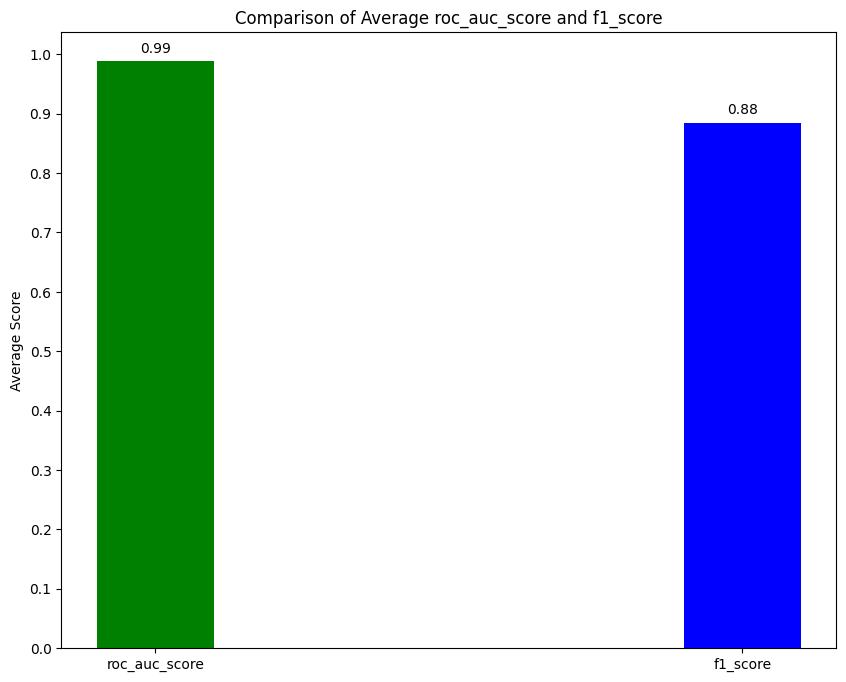

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate average scores
roc_auc_avg = np.mean(results_xgboost['roc_auc_score'])
f1_avg = np.mean(results_xgboost['f1_score'])

# Plotting
labels = ['roc_auc_score', 'f1_score']
values = [roc_auc_avg, f1_avg]
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, values, color=['green', 'blue'], width=0.2)

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.ylabel('Average Score')
plt.title('Comparison of Average roc_auc_score and f1_score')

# Customize y-axis ticks
plt.yticks(np.arange(0, 1.1, 0.1))  # Set ticks from 0 to 1 with increments of 0.1

plt.show()


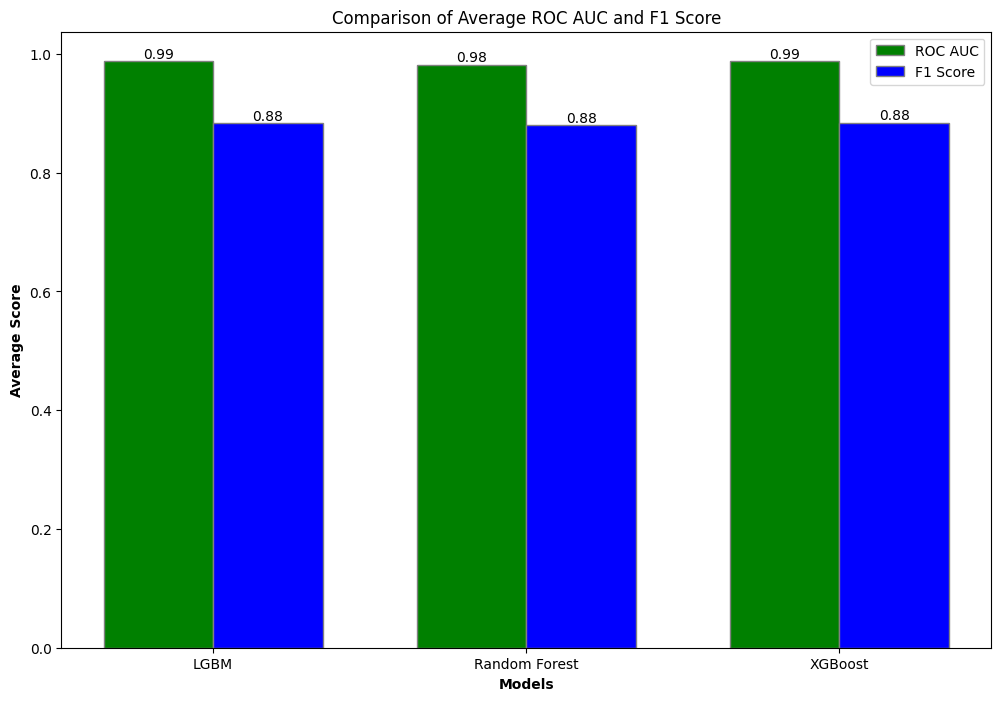

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate average scores for each DataFrame
roc_auc_avg_lgbm = np.mean(results_lgbm['roc_auc_score'])
f1_avg_lgbm = np.mean(results_lgbm['f1_score'])

roc_auc_avg_rf = np.mean(results_rf['roc_auc_score'])
f1_avg_rf = np.mean(results_rf['f1_score'])

roc_auc_avg_xgboost = np.mean(results_xgboost['roc_auc_score'])
f1_avg_xgboost = np.mean(results_xgboost['f1_score'])

# Define labels and values for each DataFrame
labels = ['LGBM', 'Random Forest', 'XGBoost']
roc_auc_values = [roc_auc_avg_lgbm, roc_auc_avg_rf, roc_auc_avg_xgboost]
f1_values = [f1_avg_lgbm, f1_avg_rf, f1_avg_xgboost]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(12, 8))

# Plotting ROC AUC scores
bars1 = plt.bar(r1, roc_auc_values, color='green', width=bar_width, edgecolor='grey', label='ROC AUC')
# Plotting F1 scores with increased gap between bars
bars2 = plt.bar(r2, f1_values, color='blue', width=bar_width, edgecolor='grey', label='F1 Score')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Average Score', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels)
plt.title('Comparison of Average ROC AUC and F1 Score')

# Add annotations
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
                 ha='center', va='bottom')

# Add legend
plt.legend()

# Show plot
plt.show()
